NESTROV ACCELERATED GRADIENT

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

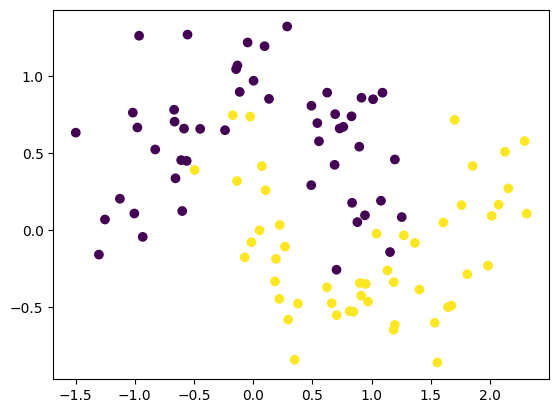

In [18]:
X,y=make_moons(100,noise=0.25,random_state=2)
plt.scatter(X[:,0],X[:,1],c=y)
p=pd.DataFrame(X,y)


In [19]:
model=Sequential()
model.add(Dense(3,activation='relu',input_dim=2,kernel_regularizer=l2(.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=l2(.01)))



In [33]:
optimizer=SGD(learning_rate=.01,momentum=.9,nesterov=True)
model.compile(optimizer=optimizer,loss='binary_crossentropy')


In [34]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [35]:
history=model.fit(X,y,epochs=3000,validation_split=.2,batch_size=32,callbacks=callback)

Epoch 1/3000
3/3 [==============================] - 0s 46ms/step - loss: 0.4545 - val_loss: 0.3660
Epoch 2/3000
3/3 [==============================] - 0s 11ms/step - loss: 0.5268 - val_loss: 0.3636
Epoch 3/3000
3/3 [==============================] - 0s 10ms/step - loss: 0.4825 - val_loss: 0.3655
Epoch 4/3000
3/3 [==============================] - 0s 9ms/step - loss: 0.5567 - val_loss: 0.3815
Epoch 5/3000
3/3 [==============================] - 0s 10ms/step - loss: 0.4742 - val_loss: 0.3887
Epoch 6/3000
3/3 [==============================] - 0s 10ms/step - loss: 0.4743 - val_loss: 0.3853
Epoch 7/3000
3/3 [==============================] - 0s 10ms/step - loss: 0.4809 - val_loss: 0.3706
Epoch 8/3000
3/3 [==============================] - 0s 11ms/step - loss: 0.4880 - val_loss: 0.3639
Epoch 9/3000
3/3 [==============================] - 0s 10ms/step - loss: 0.5958 - val_loss: 0.3679
Epoch 10/3000
3/3 [==============================] - 0s 10ms/step - loss: 0.4616 - val_loss: 0.3787
Epoch 11/3

4/4 [==============================] - 0s 996us/step - loss: 0.8812
Test Loss: 0.8812


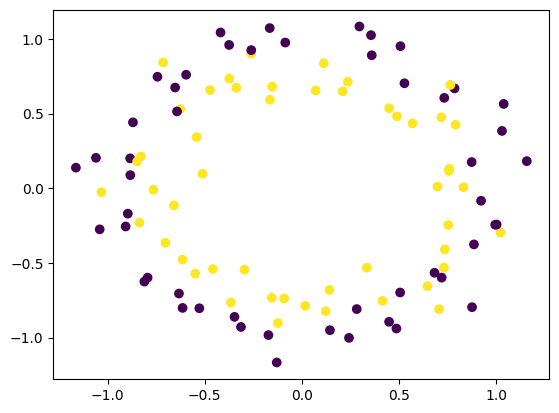

In [36]:
X1,y1=make_circles(n_samples=100,noise=.1,random_state=42)

test_loss = model.evaluate(X1, y1)
plt.scatter(X1[:,0],X1[:,1],c=y1)
print(f'Test Loss: {test_loss:.4f}')

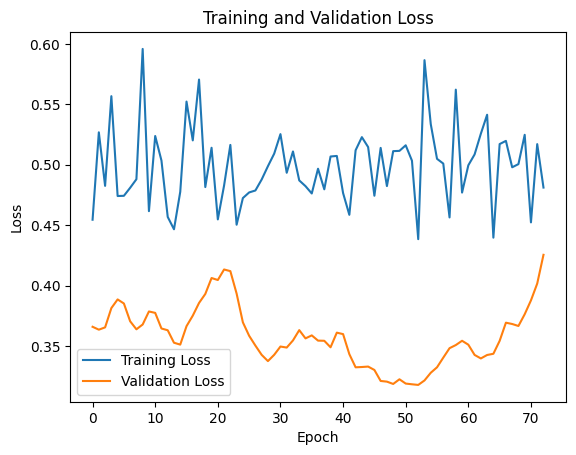

In [37]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
